<h1 style = "color: green"> Esercitazione 2 </h1>

<h3 style = "color: blue"> Esercizio 2.1 </h3>

Vogliamo calcolare l'integrale $I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx = 1$ in due modi: prima come media di valori della funzione integranda $f(x)=\frac{\pi}{2}\cos(\frac{\pi}{2} x)$, calcolati in punti estratti casualmente in modo uniforme; poi con il metodo dell'importance sampling. Quest'ultimo è simile al caso precedente ma invece di campionare una distribuzione uniforme, ne campioniamo una che approssima meglio la funzione integranda per avere una minore incertezza con lo stesso numero di passi.  
Per l'importance sampling scegliamo la retta che si annulla nello stesso punto della funzione integranda ed è normalizzata a $1$ in $(0, 1)$, cioè la retta $y=p(x)=2(1-x)$, mostrata in seguito. L'inversa della sua cumulativa è $x=1+\sqrt{1-y}$, che sarà la distribuzione di probabilità campionata. La nuova integranda è $g(x)=f(x)/p(x)=\frac{\pi}{4}\frac{\cos(\frac{\pi}{2} x)}{(1-x)}$.

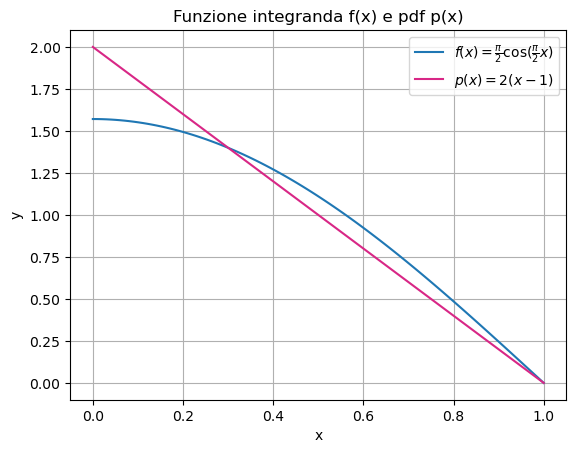

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0., 1., 100)
f = np.pi * 0.5 * np.cos(np.pi * 0.5 * x)
p = 2. * (1. - x)

plt.plot(x, f, label = r"$f(x)=\frac{\pi}{2}\cos(\frac{\pi}{2} x)$")
plt.plot(x, p, color = "#d82786", label = "$p(x)=2(x-1)$")

plt.title("Funzione integranda f(x) e pdf p(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Calcoliamo l'integrale con entrambi i metodi usando la media a blocchi, con $100$ blocchi da $100$ valori l'uno. I risultati sono mostrati nel grafico sottostante.

In [6]:
# function to open a file and read 2 values per line (mean and error)
def openFile2(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)
    mean = np.empty(fileLength)
    error = np.empty(fileLength)
    

    for i in range(fileLength):
        values = lines[i].split()
        mean[i], error[i] = float(values[0]), float(values[1])

    dataFile.close()
    
    return mean, error, fileLength

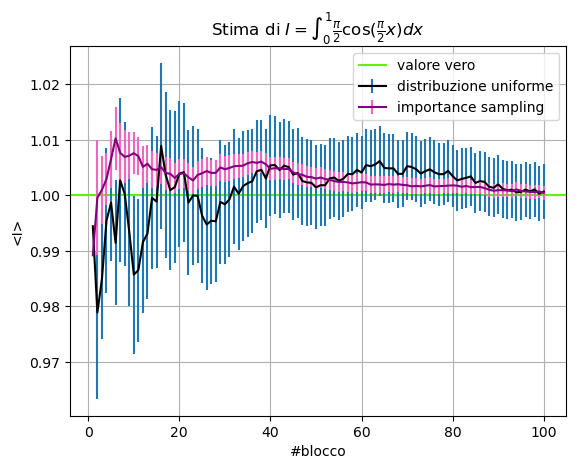

Distribuzione uniforme: <I> = 1.0007 +- 0.0049
Importance sampling: <I> = 1.0004 +- 0.0012


In [7]:
plt.axhline(1., color = "#63f00c", label = "valore vero")


mean, error, length = openFile2("code/data/data-2.1.1.out")

# save final results since we will overwrite "mean" and "error"
mean1 = mean[-1]
error1 = error[-1]

x = np.arange(length) + 1

plt.errorbar(x, mean, yerr = error, color = "black", ecolor = "#1f77b4", label = "distribuzione uniforme")


mean, error, length = openFile2("code/data/data-2.1.2.out")

plt.errorbar(x, mean, yerr = error, color = "purple", ecolor = "#f067be", label = "importance sampling")


plt.title(r"Stima di $I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx$")
plt.xlabel("#blocco")
plt.ylabel("<I>")
plt.grid(True)
plt.legend()
plt.show()

print("Distribuzione uniforme: <I> = %.4f" % mean1 + " +- %.4f" % error1)
print("Importance sampling: <I> = %.4f" % mean[-1] + " +- %.4f" % error[-1])

Notiamo subito come, con il metodo dell'importance sampling, l'incertezza sia molto minore (circa $1/4$ dell'altra), nonostante entrambe le stime convergano verso il valore vero in modo simile.

<h3 style = "color: blue"> Esercizio 2.2 </h3>

In questo esercizio simuliamo due random walks (RW, passeggiate aleatorie) in 3D: una su un reticolo cubico semplice e una nel continuo, entrambe partendo dall'origine.  

Per la prima, scegliamo casualmente a ogni passo uno dei tre assi e un verso (positivo o negativo) e ci muoviamo di $a=1$ in quella direzione.  

Per la seconda, generiamo casualmente una direzione campionando uniformemente l'angolo solido, cioè dovremmo estrarre $\theta \in [0, \pi]$ e $\phi \in [0, 2\pi)$, e muoverci anche in questo caso di $a=1$ in quella direzione. $\theta$ non può però essere estratto da una distribuzione uniforme poichè l'elemento di angolo solido è $d\Omega =\sin\theta d\theta d\phi$. Potremmo campionare la distribuzione $\sin \theta$ con il metodo dell'inversione della cumulativa, ma procediamo in un altro modo.  
Campioniamo quindi direttamente i punti sulla sfera unitaria in modo uniforme, che possiamo poi scalare di $a$ per ottenere il vettore che definisce il passo successivo nella RW. Per fare ciò, seguiamo il
<a href = "https://mathworld.wolfram.com/SpherePointPicking.html"> metodo di Marsaglia </a> 
(equazioni 9-11): come nell'esercitazione 1, estraiamo un punto $(x_p, y_p)$ nel quadrato di lato $2$ centrato nell'origine e, se si trova all'interno della circonferenza unitaria, usiamo le sue coordinate per ottenere una distribuzione uniforme di punti sulla sfera unitaria di coordinate:  
$x=2x_p\sqrt {1-x_p^2-y_p^2}$  
$y=2y_p\sqrt {1-x_p^2-y_p^2}$  
$z=1-2(x_p^2+y_p^2)$  

Simuliamo ognuna delle due random walks $10^4$ volte. In figura è mostrato, in funzione del passo della RW, il valore finale della media a blocchi, con relativa incertezza, di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ (radice della distanza quadratica media dall'origine a ogni passo delle RWs). Ci aspettiamo un andamento di questa quantità in funzione del numero di passi del tipo $f(N)=k\sqrt{N}$, dove $N$ è il passo della RW e $k=1$, poiché la RW è un processo diffusivo e $\langle |\vec{r}_N|^2 \rangle =Na^2$, dove $a=1$ è la lunghezza del passo.

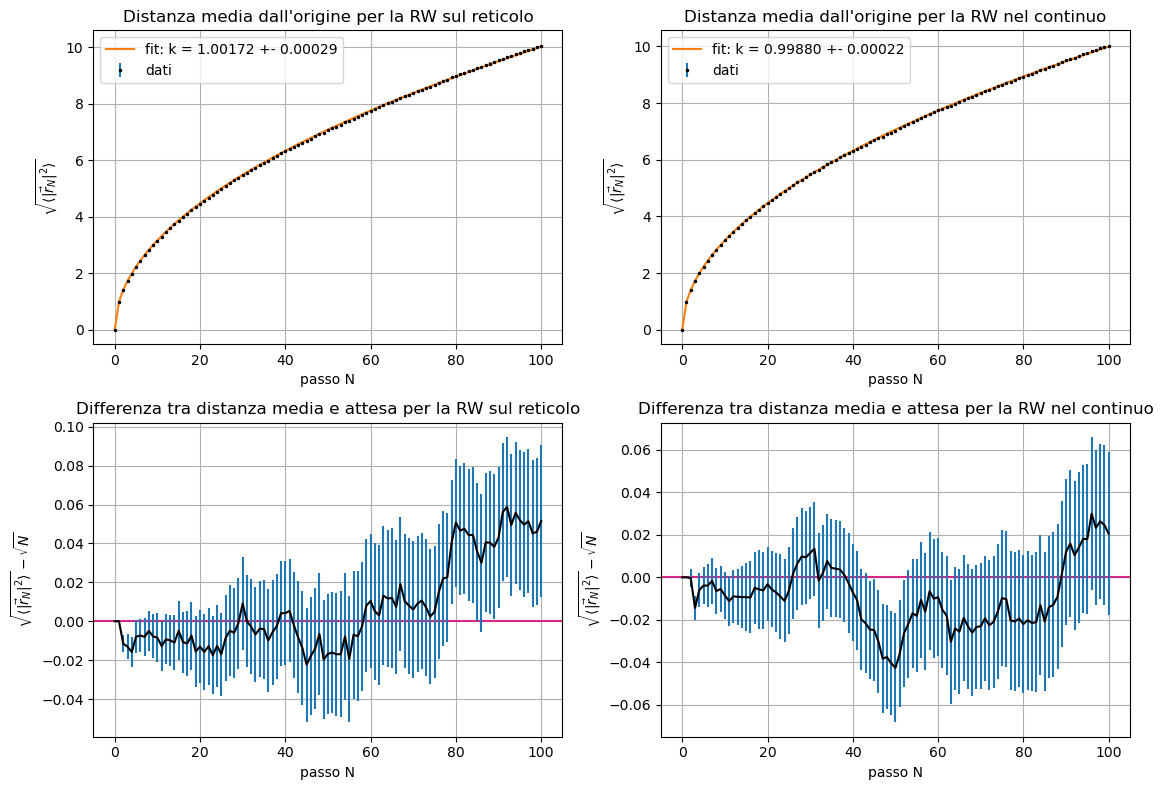

In [8]:
import scipy.optimize as fit


def fitFunction(x, k):
    return k * np.sqrt(x)


fig, ax = plt.subplots(2, 2, figsize = (11.5, 8))


mean, error, length = openFile2("code/data/data-2.2.1.out")

x = np.arange(length)

ax[0, 0].errorbar(x, mean, yerr = error, fmt = ".", markersize = 3, color = "black", ecolor = "#1f77b4", label = "dati")
ax[0, 0].set_title("Distanza media dall'origine per la RW sul reticolo")
ax[0, 0].set_xlabel("passo N")
ax[0, 0].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}$")
ax[0, 0].grid(True)


# fit with k*sqrt(#step)
popt, pcov = fit.curve_fit(fitFunction, x, mean)
ax[0, 0].plot(x, fitFunction(x, popt), label = "fit: k = %.5f +- %.5f" % (popt, np.sqrt(pcov)), color = "#ff7f0e")
ax[0, 0].legend()

# plot the difference between our results and sqrt(#step) (k=1)
ax[1, 0].axhline(0., color = "#d82786")
ax[1, 0].errorbar(x, mean - np.sqrt(x), yerr = error, color = "black", ecolor = "#1f77b4")
ax[1, 0].set_title("Differenza tra distanza media e attesa per la RW sul reticolo")
ax[1, 0].set_xlabel("passo N")
ax[1, 0].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}-\sqrt{N}$")
ax[1, 0].grid(True)


mean, error, length = openFile2("code/data/data-2.2.2.out")

ax[0, 1].errorbar(x, mean, yerr = error, fmt = ".", markersize = 3, color = "black", ecolor = "#1f77b4", label = "dati")
ax[0, 1].set_title("Distanza media dall'origine per la RW nel continuo")
ax[0, 1].set_xlabel("passo N")
ax[0, 1].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}$")
ax[0, 1].grid(True)


# fit with k*sqrt(#step)
popt, pcov = fit.curve_fit(fitFunction, x, mean)
ax[0, 1].plot(x, fitFunction(x, popt), label = "fit: k = %.5f +- %.5f" % (popt, np.sqrt(pcov)), color = "#ff7f0e")
ax[0, 1].legend()

# plot the difference between our results and sqrt(#step) (k=1)
ax[1, 1].axhline(0., color = "#d82786")
ax[1, 1].errorbar(x, mean - np.sqrt(x), yerr = error, color = "black", ecolor = "#1f77b4")
ax[1, 1].set_title("Differenza tra distanza media e attesa per la RW nel continuo")
ax[1, 1].set_xlabel("passo N")
ax[1, 1].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}-\sqrt{N}$")
ax[1, 1].grid(True)


fig.tight_layout()
plt.show()

Il valore di $k$ trovato dai fit non è compatibile con il valore atteso $k=1$ (in entrambi i casi $k$ è oltre due volte l'incertezza dal valore atteso), ma, come si vede dagli altri due grafici, a ogni passo la distanza è compatibile con il valore atteso $\sqrt{N}$. Il risultato conferma quindi il comportamento diffusivo delle due RW in 3D.